# Movie Recommendation System - Mike Blakeman
Final Project CIS731

### Loading the Dataset (Obtain data)
Load three datasets from the MovieLens data.

This contains a movies file, a users file, and a ratings file.

In [0]:
# Import libraries to read in as Pandas DataFrames
import numpy as np
import pandas as pd

# Load ratings file
ratings = pd.read_csv('https://raw.githubusercontent.com/mikeblakeman/cis731/master/data/ratings.csv', sep='\t', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Load users file
users = pd.read_csv('https://raw.githubusercontent.com/mikeblakeman/cis731/master/data/users.csv', sep='\t', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Load movies csv
movies = pd.read_csv('https://raw.githubusercontent.com/mikeblakeman/cis731/master/data/movies.csv', sep='\t', usecols=['movie_id', 'title', 'genres'])

Visualize the data that we've read in from the csv's.

In [291]:
movies.sample(10)

,movie_id,title,genres
28,29,"City of Lost Children, The (1995)",Adventure|Sci-Fi
2657,2726,"Killing, The (1956)",Crime|Film-Noir
2019,2088,Popeye (1980),Adventure|Comedy|Musical
1973,2042,D2: The Mighty Ducks (1994),Children's|Comedy
631,636,Frisk (1995),Drama
592,596,Pinocchio (1940),Animation|Children's
3192,3261,Singles (1992),Comedy|Drama|Romance
2149,2218,Juno and Paycock (1930),Drama
1853,1922,Whatever (1998),Drama
3429,3498,Midnight Express (1978),Drama


In [292]:
ratings.sample(10)

,user_id,movie_id,rating,timestamp
425481,2581,535,5,973889763
675164,4051,175,5,965495141
640183,3847,2001,2,965882933
392071,2304,3614,3,974503407
620992,3761,1214,5,966092440
597393,3632,3082,4,966536474
459204,2826,2571,3,973524583
319857,1899,783,3,974776232
705698,4227,1346,3,965323499
476737,2928,441,5,971554524


In [293]:
users.sample(10)

,user_id,gender,zipcode,age_desc,occ_desc
3374,3375,M,89193,25-34,college/grad student
5376,5377,F,10017,18-24,clerical/admin
3057,3058,M,55123,18-24,programmer
3794,3795,F,91405,18-24,college/grad student
5171,5172,F,05602,35-44,lawyer
5332,5333,F,02332,25-34,executive/managerial
408,409,M,55122,18-24,programmer
614,615,M,32951,50-55,technician/engineer
5778,5779,M,10011,25-34,customer service
2084,2085,M,06360,18-24,other or not specified


In this dataset there are 3706 movies and 6040 users as seen below:

In [302]:
uniqueMovieCount = ratings.movie_id.unique().shape[0]
uniqueUserCount = ratings.user_id.unique().shape[0]
print('Number of movies:' + str(uniqueMovieCount))
print('Number of users:' + str(uniqueUserCount))

Number of movies:3706
Number of users:6040


Format ratings matrix with empty ratings for movies the user has not rated yet.

In [304]:
RatingsDf = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
RatingsDf.sample(10)

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4945,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5676,5.0,0.0,4.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4964,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3917,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cleaning the Data

In [0]:
# De-normalize the data and put it in a numpy array.
allRatings = Ratings.values
averageUserRating = np.mean(allRatings, axis = 1)
deAveragedRatings = allRatings - averageUserRating.reshape(-1, 1)

With my ratings matrix properly formatted and normalized, I'm ready to do some dimensionality reduction. But first, let's go over the math.

### Matrix Factorization (MF) (Exploring data)

In [327]:
sparsity = round(1.0 - len(ratings) / float(uniqueUserCount * uniqueMovieCount), 3)
print("Our dataset is %i percent sparse." % (sparsity * 100))

Our dataset is 95 percent sparse.


### Support Vector Decomposition (SVD)

In [333]:
from scipy.sparse.linalg import svds
U, diagonalArray, Vt = svds(deAveragedRatings, k = 50)
diagonalArray = np.diag(diagonalArray)
allPredictedRatings = np.dot(np.dot(U, sigma), Vt) + averageUserRating.reshape(-1, 1)
preds = pd.DataFrame(allPredictedRatings, columns = Ratings.columns)
preds.sample(10)

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
429,0.800571,-0.080595,0.761199,0.201152,0.314906,0.285544,1.795406,-0.078761,-0.036913,-0.010379,2.652472,0.036164,-0.081004,-0.097100,0.053930,0.047493,2.345544,-0.027786,0.083862,-0.012648,0.354634,0.006765,0.049210,0.007437,0.854102,0.099871,0.069891,0.752431,0.024855,0.063366,0.057302,-0.342051,0.018301,1.228701,0.149977,-0.464826,0.016852,0.044740,2.378858,0.004722,...,-0.020937,-0.079711,-0.089343,0.035259,0.084175,0.084321,0.054451,0.031811,0.049992,0.065403,0.028477,0.050342,-0.055607,0.048924,0.059612,0.104179,0.049103,0.095096,0.018336,0.044374,0.002255,0.031383,0.003203,0.024730,0.017959,-0.002369,0.005589,0.007296,-0.001424,0.018213,-0.017956,0.008041,0.005963,-0.058476,0.062597,0.204897,-0.101222,0.011352,-0.029638,-0.230545
554,3.230044,-0.022759,0.049898,-0.012435,-0.078273,0.025669,0.032798,0.032867,-0.014167,0.016096,0.117930,-0.096075,0.225744,-0.053442,-0.021589,-0.242375,0.088593,-0.056011,-0.047952,-0.003349,-0.002713,0.081106,-0.015928,-0.186231,-0.501375,-0.072742,0.044128,0.157818,0.112610,-0.058366,0.035998,0.013593,-0.005085,1.578044,0.019180,-0.186920,0.002708,0.002535,0.128021,-0.028275,...,0.074640,0.155313,0.290323,1.070265,0.007329,-0.012449,-0.025720,0.009791,-0.013246,-0.008888,-0.042828,-0.016293,0.019287,-0.016182,0.050799,0.023429,0.062798,-0.030469,-0.003523,-0.005854,-0.020630,0.002485,-0.006740,-0.058372,0.033483,0.014765,0.009488,-0.004915,0.014328,0.007984,0.122817,0.016861,0.047426,0.097622,0.023207,1.589104,0.662558,0.115679,0.089142,0.974202
4052,1.203101,1.264008,0.334737,0.213321,-0.022001,1.611768,-0.005224,-0.078714,0.182631,1.325124,0.147887,0.276275,0.421927,0.276940,0.154893,1.772667,-0.536126,0.314260,0.052814,0.429646,1.940823,1.156893,0.300291,0.672331,1.496929,0.030349,0.118778,-0.321077,0.471099,-0.114581,0.212587,2.347556,-0.042018,-0.369418,-0.130664,0.319178,-0.104474,-0.055194,0.717228,-0.067824,...,-0.032793,-0.103999,-0.048851,-0.457252,1.122495,0.688258,0.305231,0.128524,0.073061,0.032843,0.219714,-0.003755,0.259867,0.446882,1.004278,0.564513,-0.040368,0.761605,-0.014769,0.624264,-0.026509,-0.019635,0.020231,0.022033,0.441776,0.090309,0.077088,-0.009257,0.087449,0.025660,0.075307,-0.082353,-0.026318,-0.046331,0.141289,-0.486968,-0.096493,-0.072696,-0.141392,-0.058275
3569,-0.133043,0.060579,-0.056491,0.004885,0.021851,-0.101718,-0.114988,0.007361,0.009177,-0.112889,-0.025495,0.012656,0.023668,0.042986,0.018586,-0.037099,-0.088512,0.003507,0.022234,0.006100,-0.036259,-0.006268,-0.024450,-0.021466,0.048008,0.013600,-0.004224,0.057806,0.021960,-0.005397,-0.005643,-0.042307,0.000791,-0.095487,0.004300,0.108848,-0.001748,0.002173,-0.054243,-0.010808,...,0.002791,-0.019112,0.012494,-0.116964,-0.020943,-0.003050,0.009168,0.048000,-0.008455,-0.010518,-0.020811,-0.012253,0.159996,-0.024868,-0.005783,-0.004847,0.160614,-0.013526,-0.014278,-0.011641,-0.002039,-0.001857,0.001275,0.039646,-0.040400,-0.005485,-0.000456,0.002917,-0.005138,0.000836,0.031435,-0.006397,-0.007577,-0.016027,0.014941,-0.079139,0.063697,-0.024042,0.006248,-0.017266
5832,2.652538,0.099906,0.067011,0.193168,0.063367,0.337606,-0.021955,0.067175,-0.035779,-0.060670,0.187247,0.000861,0.127003,0.110642,0.063931,0.047708,1.573423,-0.246036,0.106975,0.004042,0.920653,0.218200,-0.101303,1.010650,1.003425,0.070591,0.044568,0.079031,-0.107033,0.129084,0.062010,0.328420,-0.005738,3.178879,0.122974,1.811363,0.003423,0.019884,0.320635,0.076161,...,0.008995,0.100434,0.049663,0.047664,0.005991,0.001310,-0.020745,0.023025,-0.008968,-0.025513,-0.013173,-0.024160,0.005578,0.064036,-0.043279,-0.011948,-0.010872,-0.046835,-0.024775,-0.131428,-0.009441,-0.002140,-0.007466,-0.034994,0.010078,0.016677,0.0111

In [0]:
def getNRecommendations(predictions, userId, movies, originalRatings, reccomendationCount):
    
    # Sort the predictions per user.
    row = userId - 1 # row offset
    sortedPredictions = preds.iloc[row].sort_values(ascending=False)
    
    # Merge user data and movies, then sort.
    userData = originalRatings[originalRatings.user_id == (userId)]
    userFullData = (userData.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id')
                      .sort_values(['rating'], ascending=False))

    print('User {0} rated movie count:{1}'.format(userId, userFullData.shape[0]))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(userFullData['movie_id'])].
         merge(pd.DataFrame(sortedPredictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {row: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:reccomendationCount, :-1]
                      )

    return userFullData, recommendations



  # def getNRecommendations(predictions, userId, movies, originalRatings, reccomendationCount):
    
  #   # Sort the predictions per user.
  #   row = userId - 1 # row offset
  #   sortedPredictions = preds.iloc[row].sort_values(ascending=False)
    
  #   # Merge user data and movies, then sort.
  #   userData = originalRatings[originalRatings.user_id == (userId)]
  #   userFullData = (userData.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id')
  #                     .sort_values(['rating'], ascending=False))

  #   print('User %i rated movie count:%i' % userId, userFullData.shape[0])
        
  #   # Recommend the highest predicted rating movies that the user hasn't seen yet.
  #   recommendations = (movies[~movies['movie_id'].isin(userFullData['movie_id'])].
  #        merge(pd.DataFrame(sortedPredictions).reset_index(), how = 'left',
  #              left_on = 'movie_id',
  #              right_on = 'movie_id').
  #        rename(columns = {row: 'Predictions'}).
  #        sort_values('Predictions', ascending = False).
  #                      iloc[:reccomendationCount, :-1]
  #                     )

  #   return userFullData, recommendations

Recommend 10 movies for random user.

In [379]:
import random
randomUser = random.choice(users.user_id)
alreadyRated, predictions = getNRecommendations(preds, randomUser, movies, ratings, 10)

User 5948 rated movie count:398


In [380]:
# Top 20 movies that the user has already rated.
alreadyRated.head(20)

,user_id,movie_id,rating,timestamp,title,genres
397,5948,3788,5,962043014,Blowup (1966),Drama|Mystery
183,5948,1938,5,1043068730,"Lost Weekend, The (1945)",Drama
315,5948,1346,5,976739393,Cat People (1982),Horror
314,5948,1345,5,957373814,Carrie (1976),Horror
151,5948,2186,5,957192056,Strangers on a Train (1951),Film-Noir|Thriller
152,5948,1537,5,957192327,Shall We Dance? (Shall We Dansu?) (1996),Comedy
313,5948,1333,5,957874709,"Birds, The (1963)",Horror
310,5948,1304,5,1043068456,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western
157,5948,3168,5,957193326,Easy Rider (1969),Adventure|Drama
307,5948,3684,5,959826450,"Fabulous Baker Boys, The (1989)",Drama|Romance


In [383]:
# Top 10 movies recommendations for the user
predictions

,movie_id,title,genres
2937,3363,American Graffiti (1973),Comedy|Drama
841,953,It's a Wonderful Life (1946),Drama
1071,1252,Chinatown (1974),Film-Noir|Mystery|Thriller
1662,1947,West Side Story (1961),Musical|Romance
1074,1256,Duck Soup (1933),Comedy|War
1081,1267,"Manchurian Candidate, The (1962)",Film-Noir|Thriller
842,954,Mr. Smith Goes to Washington (1939),Drama
3028,3462,Modern Times (1936),Comedy
2689,3095,"Grapes of Wrath, The (1940)",Drama
1095,1293,Gandhi (1982),Drama


### Modeling Our Data

Data modeling using Surprise library

In [0]:
!pip install surprise

In [0]:
# Import libraries from Surprise package
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import cross_validate, KFold

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

In [254]:
# Define a cross-validation iterator
kf = KFold(n_splits=5)

# Use the SVD algorithm.
svd = SVD()

for trainset, testset in kf.split(data):

  # Train and test algorithm:
  svd.fit(trainset)
  predictions = svd.test(testset)

  # Compute and print the RMSE of the SVD algorithm
  accuracy.rmse(predictions, verbose=True)

RMSE: 0.8739
RMSE: 0.8764
RMSE: 0.8728
RMSE: 0.8716
RMSE: 0.8733


The average RMSE is: 0.8736 

Check the ratings that the user has given.

In [385]:
ratings[ratings['user_id'] == randomUser]

,user_id,movie_id,rating,timestamp
983896,5948,586,3,959956421
983897,5948,3,3,957195752
983898,5948,2065,4,957190859
983899,5948,2067,4,957192704
983900,5948,2068,5,1030013379
983901,5948,592,4,957191091
983902,5948,594,5,957214176
983903,5948,597,3,959956675
983904,5948,3011,4,957874817
983905,5948,1411,5,957995884


Use SVD to predict the rating that the user will give to a random movie.

In [416]:
randomMovieId = random.choice(movies.movie_id)
randomMovie = movies[movies['movie_id'] == randomMovieId]
randomMovieTitle = str(randomMovie.title).split("    ")[1].split("\n")[0]
estimate = svd.predict(randomUser, randomMovieId).est
print("User {0} would rate \"{1}\" {2} stars.".format(randomUser, randomMovieTitle, estimate))

User 5948 would rate "Indecent Proposal (1993)" 2.7791474376 stars.


### Interpret Data

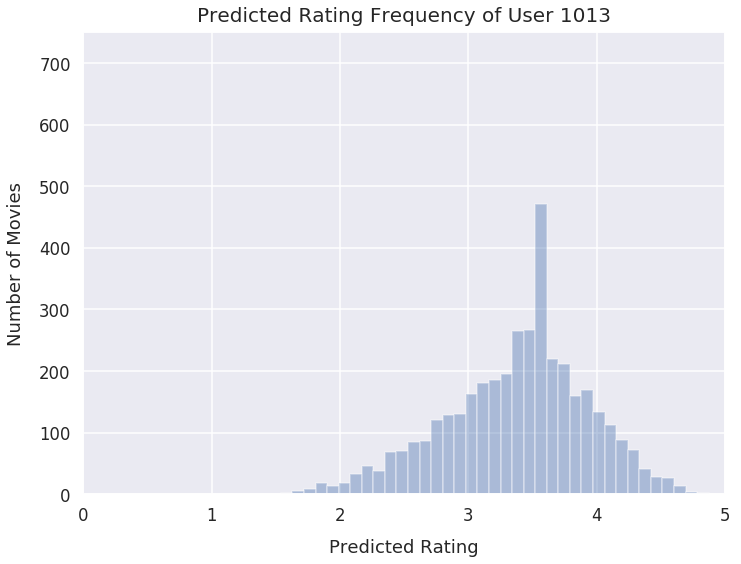

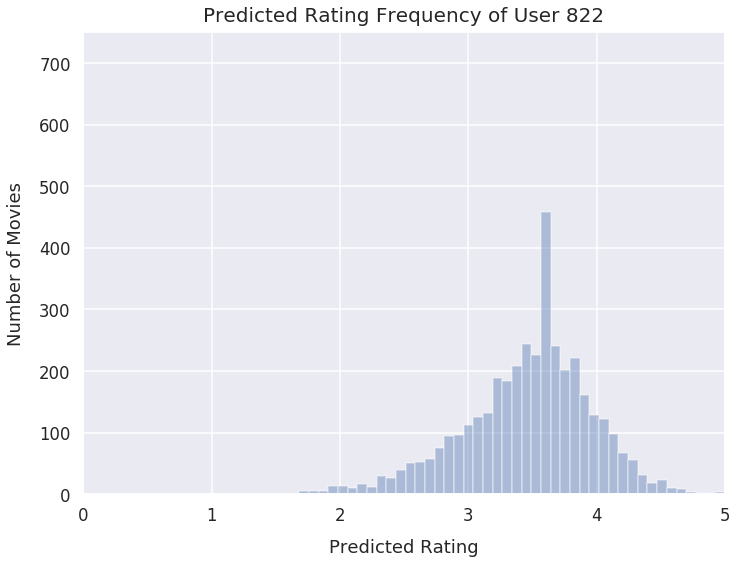

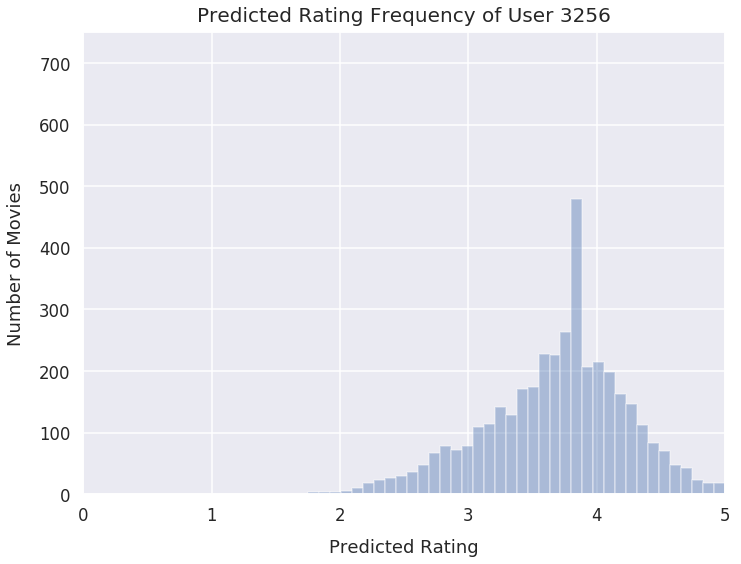

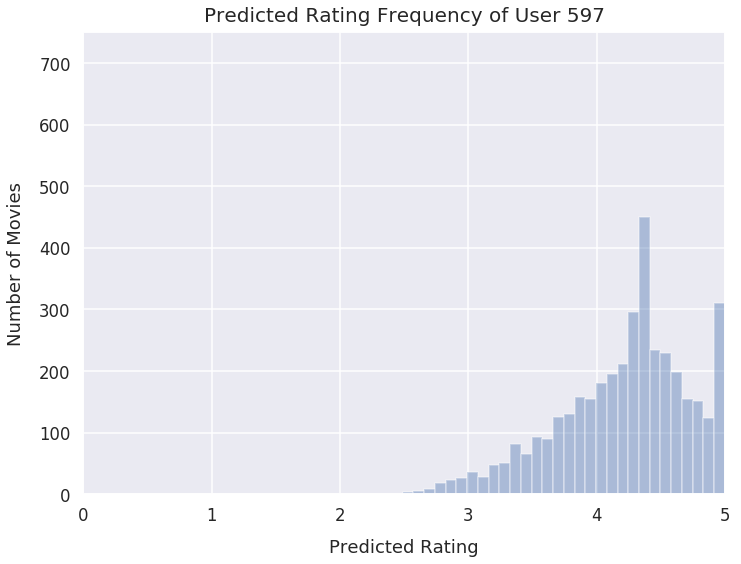

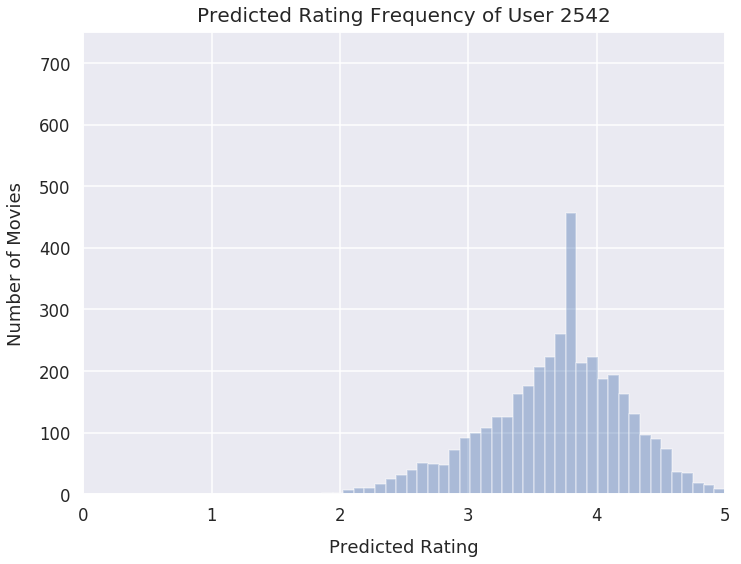

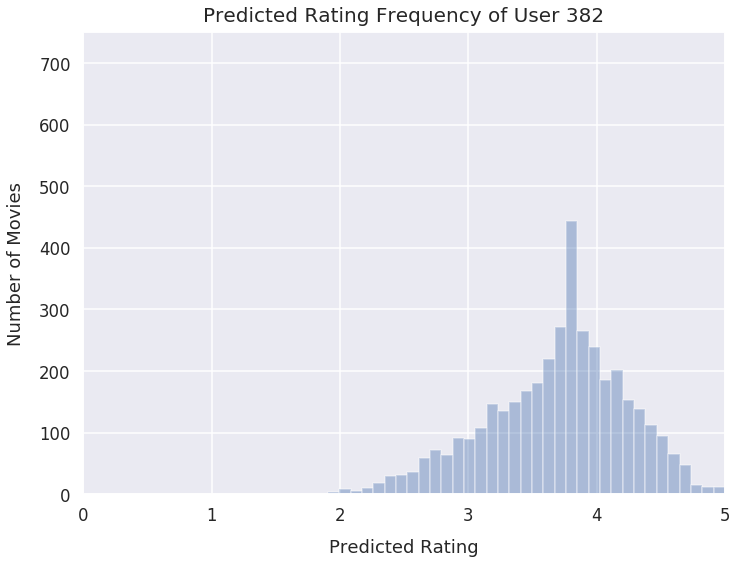

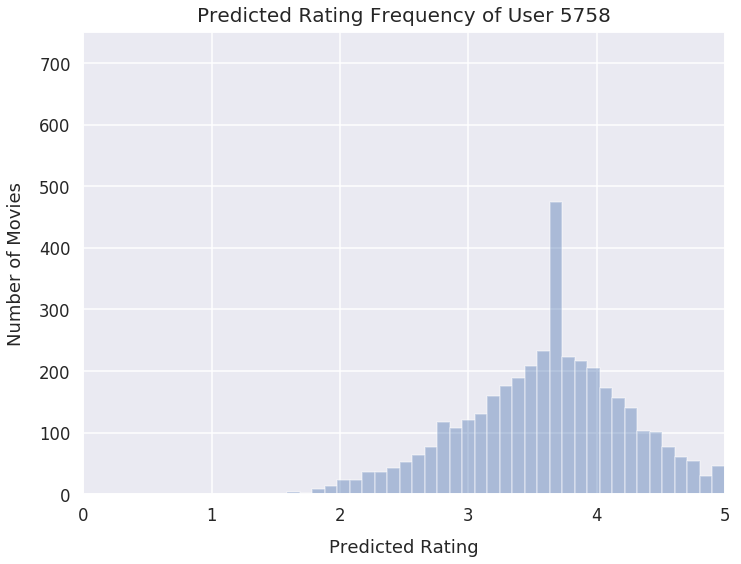

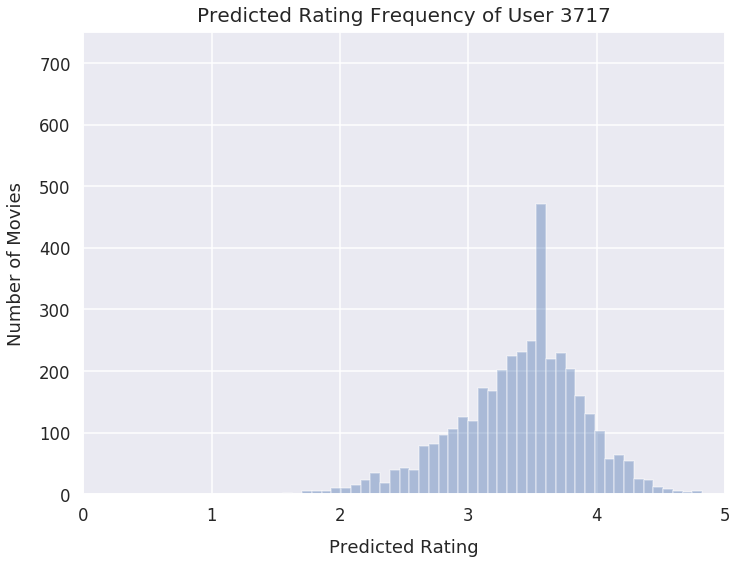

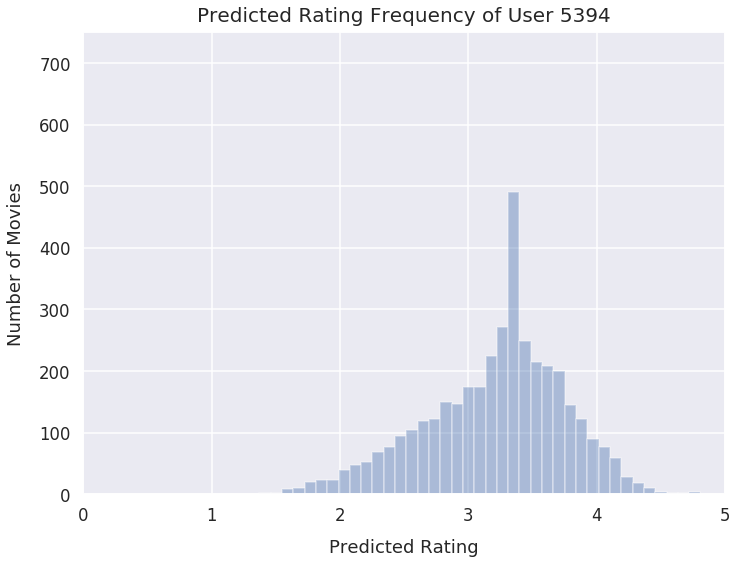

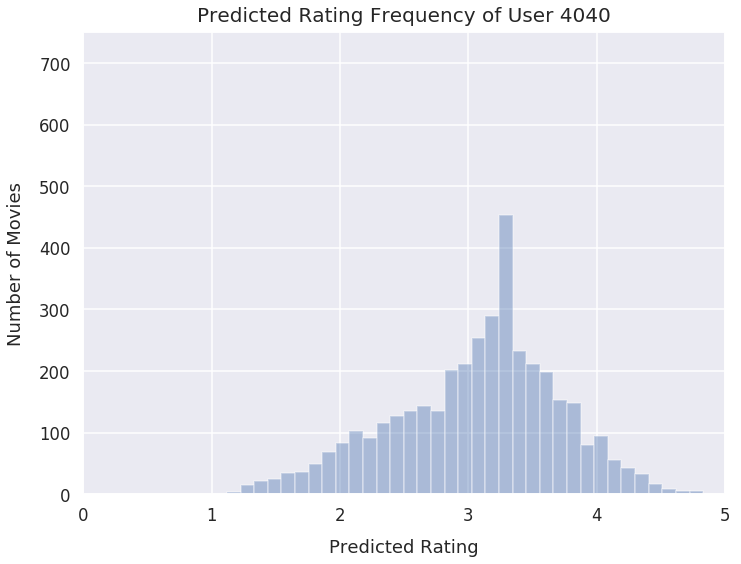

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

def getPredictedEsitmate(user, movie):
  return svd.predict(user, movie).est

def predictAllRatingsForUser(user):
  estimateDf = pd.DataFrame([])

  for movie in movies.movie_id:
      rating = getPredictedEsitmate(user, movie)
      estimateDf = estimateDf.append(pd.DataFrame({'movieId': movie, 'ratings': rating}, index=[0]), ignore_index=True)
  
  return estimateDf

def showPlotForDataFrame(user, dataFrame):
  sns.set(rc={'figure.figsize':(11.5, 8.5)})
  sns.set_context("talk")  
  sns.distplot(dataFrame['ratings'], kde=False)
  plt.xlim([0, 5])
  plt.ylim([0, 750])
  plt.xlabel("Predicted Rating", labelpad=14)
  plt.ylabel("Number of Movies", labelpad=14)
  title = "Predicted Rating Frequency of User %i" % user
  plt.title(title, fontsize=20, y=1.01)
  plt.show()

randomUsers = random.sample(users.user_id, 10)

for randomUser in randomUsers:
  df = predictAllRatingsForUser(randomUser)
  showPlotForDataFrame(randomUser, df)
  


